In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.regression import (
    run_ols_table_all, prettify, plot_forest_params_both_states, 
    plot_rmse_by_metric, plot_delta_rmse, 
    plot_pct_delta_rmse, rmse_comparison,
    plot_r2
)
from src.linear_mixed_models import run_lmm_table_all_r, prettify_lmm_summary
import pandas as pd

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
R callback write-console: Registered S3 methods overwritten by 'MuMIn':
  method        from 
  nobs.multinom broom
  nobs.fitdistr broom
  


In [3]:
exclude_metrics = ["Range Ratio", "Path length"]
row_order = [
    "AP Range", "ML Range", "AP MAD", "ML MAD", "AP Max abs dev", 
    "ML Max abs dev", "AP RMS", "ML RMS", "Sway RMS", "Ellipse area"
    ]

# older Adults

In [4]:
older_adults_trial_level = pd.read_csv("../data/processed/older_adults/trial_measurements.csv")
older_adults_average_level = pd.read_csv("../data/processed/older_adults/average_measurements.csv")

# Regression

### Trial-level

In [5]:
table_lmm = run_lmm_table_all_r(
    df_trial=older_adults_trial_level,
    include_ci=True,
)

In [6]:
pretty_table_lmm = prettify_lmm_summary(table_lmm)
pretty_table_lmm

,metric,state,intercept,intercept_CI,intercept_p,slope_zed,slope_CI,slope_p1,r2_marginal,r2_conditional,rmse_lmm,rmse_raw,is_singular,zed_centered,zed_mean
0,AP MAD,closed,0.634,"[0.589, 0.678]",0.0,0.823,"[0.747, 0.899]",0.000,0.656,0.868,0.089,0.287,False,True,0.669
1,AP MAD,open,0.535,"[0.500, 0.570]",0.0,0.619,"[0.541, 0.697]",0.000,0.559,0.748,0.101,0.227,False,True,0.622
2,AP Max abs dev,closed,2.466,"[2.225, 2.708]",0.0,0.741,"[0.623, 0.859]",0.000,0.484,0.693,0.705,1.342,False,True,2.512
3,AP Max abs dev,open,2.046,"[1.806, 2.286]",0.0,0.048,"[0.007, 0.089]",0.000,0.020,0.431,0.694,1.007,False,True,2.475
4,AP RMS,closed,0.798,"[0.743, 0.853]",0.0,0.867,"[0.792, 0.942]",0.001,0.687,0.884,0.108,0.364,False,True,0.837
5,AP RMS,open,0.675,"[0.618, 0.732]",0.0,0.316,"[0.244, 0.388]",0.000,0.245,0.573,0.161,0.285,False,True,0.793
6,AP Range,closed,4.268,"[3.887, 4.648]",0.0,0.780,"[0.670, 0.890]",0.000,0.519,0.797,0.825,1.944,False,True,4.351
7,AP Range,open,3.566,"[3.195, 3.936]",0.0,0.110,"[0.056, 0.165]",0.000,0.056,0.485,1.010,1.570,False,True,4.203
8,Ellipse area,closed,11.915,"[10.486, 13.344]",0.0,1.322,"[1.204, 1.440]",0.000,0.776,0.847,4.867,13.321,False,True,10.188
9,Ellipse area,open,8.581,"[7.380, 9.782]",0.0,0.719,"[0.645, 0.792]",0.000,0.689,0.849,2.946,8.881,False,True,8.830


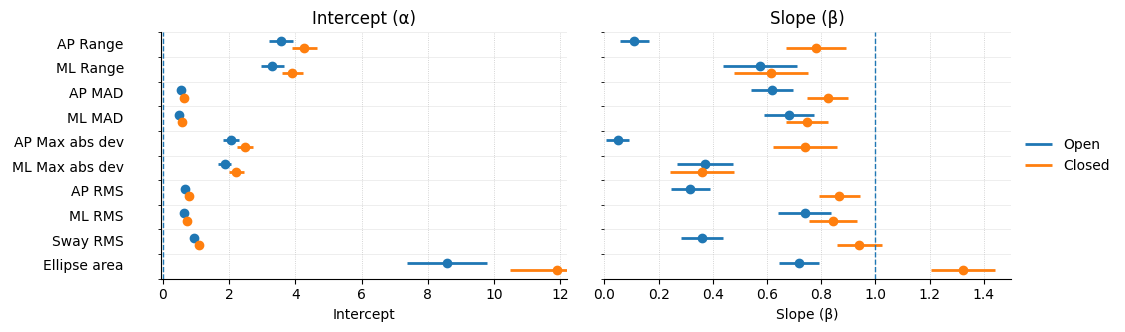

In [13]:
plot_forest_params_both_states(table_lmm, slope_xlim=(0,1.5), exclude_metrics=exclude_metrics, row_order=row_order)

### Average level

In [8]:
# Run across all metrics & states
table_ols = run_ols_table_all(older_adults_average_level, states=("open","closed"), robust="HC3")

table_ols_pretty = prettify(table_ols, digits=3)
table_ols_pretty

,metric,state,intercept,intercept_CI,intercept_p,slope_zed,slope_CI,slope_p,slope_eq1_p,r2,r2_adj,rmse_model,rmse_raw
0,AP MAD,closed,-0.014,"[-0.177, 0.149]",0.866,0.969,"[0.690, 1.248]",0.000,0.826,0.698,0.689,0.128,0.133
1,AP MAD,open,0.080,"[-0.052, 0.212]",0.237,0.732,"[0.511, 0.953]",0.000,0.017,0.646,0.636,0.103,0.145
2,AP Max abs dev,closed,0.840,"[-0.266, 1.945]",0.137,0.648,"[0.138, 1.157]",0.013,0.175,0.463,0.448,0.704,0.790
3,AP Max abs dev,open,1.631,"[-0.381, 3.643]",0.112,0.168,"[-0.757, 1.093]",0.722,0.078,0.102,0.077,0.699,1.427
4,AP RMS,closed,-0.013,"[-0.203, 0.178]",0.898,0.969,"[0.704, 1.233]",0.000,0.816,0.704,0.696,0.160,0.165
5,AP RMS,open,0.188,"[-0.109, 0.484]",0.214,0.614,"[0.199, 1.029]",0.004,0.068,0.524,0.511,0.152,0.217
6,AP Range,closed,1.233,"[-0.595, 3.060]",0.186,0.698,"[0.219, 1.176]",0.004,0.216,0.474,0.459,1.114,1.208
7,AP Range,open,2.153,"[-0.391, 4.696]",0.097,0.337,"[-0.343, 1.016]",0.332,0.056,0.245,0.224,1.037,1.684
8,Ellipse area,closed,-1.341,"[-6.046, 3.365]",0.577,1.301,"[0.702, 1.901]",0.000,0.325,0.838,0.833,4.197,5.046
9,Ellipse area,open,1.092,"[-4.254, 6.438]",0.689,0.848,"[0.095, 1.602]",0.027,0.693,0.791,0.785,3.437,3.647


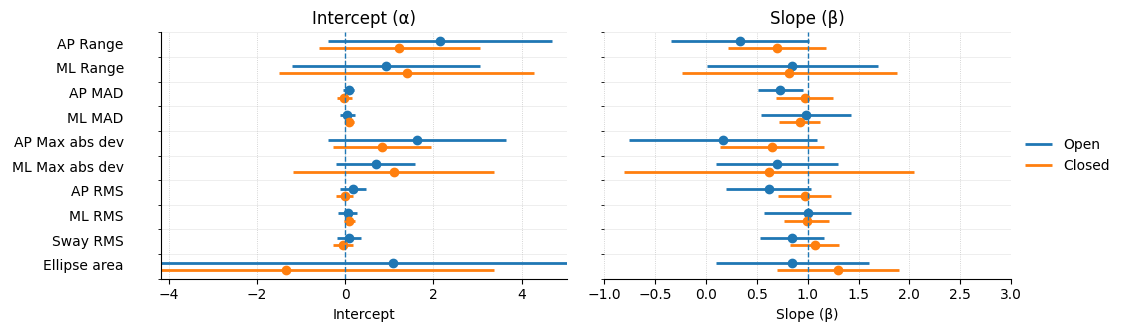

In [9]:
plot_forest_params_both_states(table_ols, slope_xlim=(-1,3), exclude_metrics=exclude_metrics, row_order=row_order)

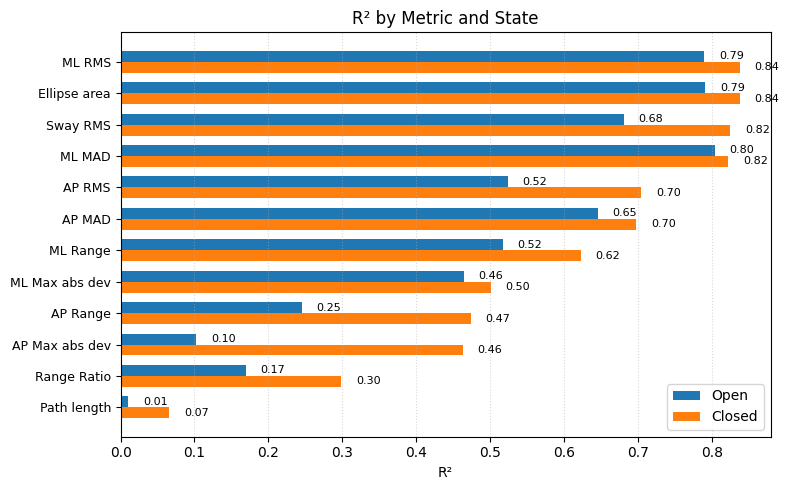

In [13]:
plot_r2(table_ols)

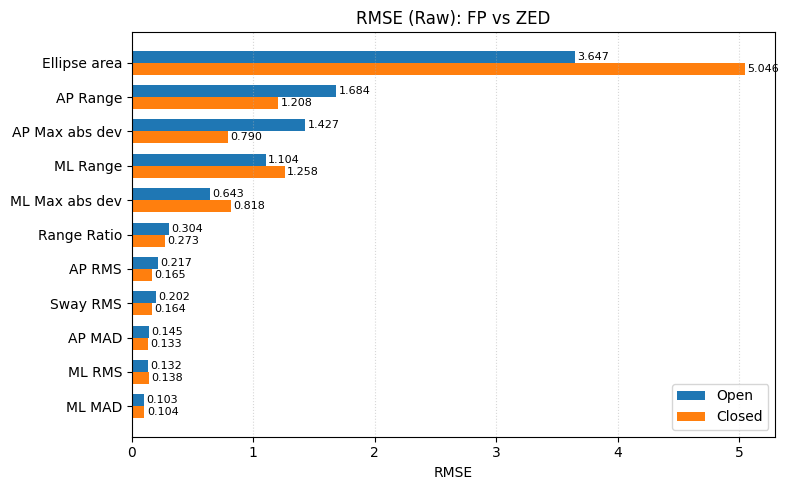

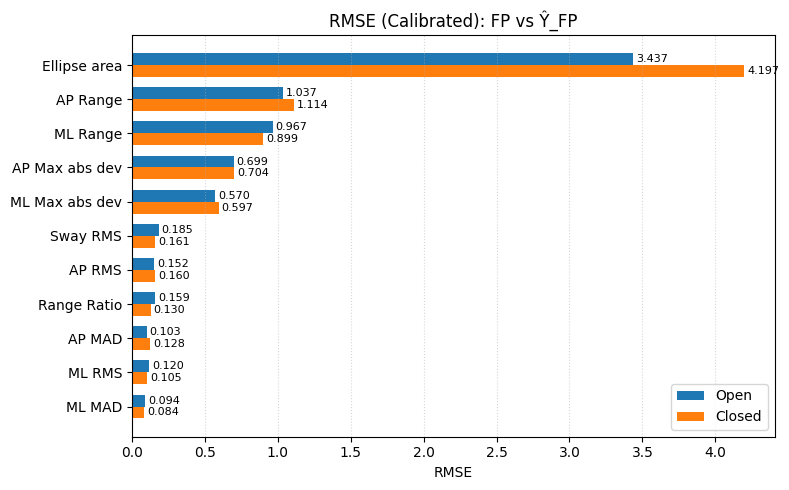

In [14]:
plot_rmse_by_metric(table_ols, exclude_metrics=["Path length"], rmse_col="rmse_raw")
plot_rmse_by_metric(table_ols, exclude_metrics=["Path length"])

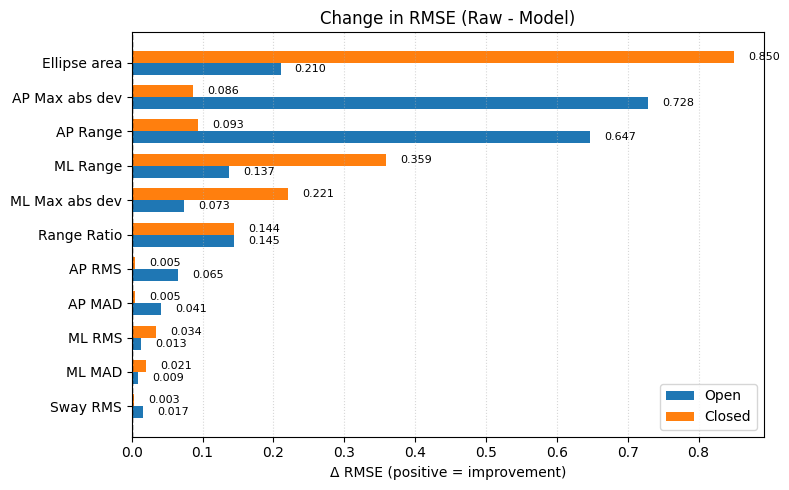

In [15]:
plot_delta_rmse(table_ols, exclude_metrics=["Path length"])

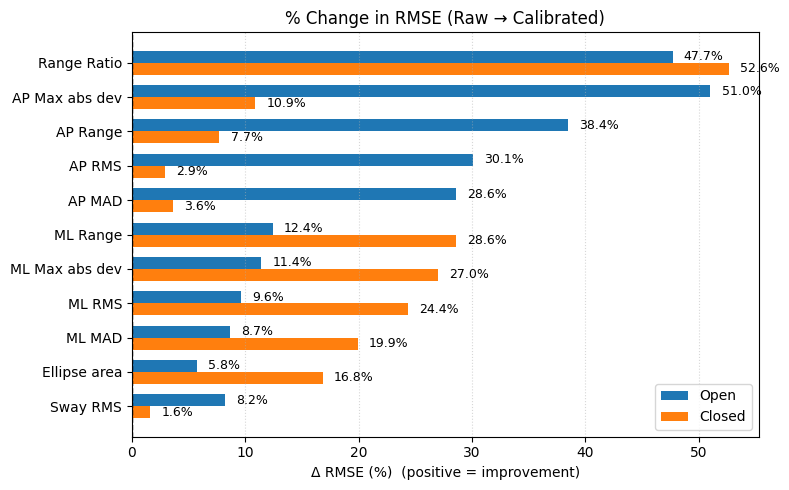

In [16]:
plot_pct_delta_rmse(table_ols, exclude_metrics=["Path length"])

In [17]:
rmse_comparison(table_ols)

,metric,state,rmse_raw,rmse_model,diff,pct_change
0,Range Ratio,closed,0.273,0.130,0.144,52.630
1,AP Max abs dev,open,1.427,0.699,0.728,51.024
2,Range Ratio,open,0.304,0.159,0.145,47.678
3,Path length,closed,60.953,34.062,26.891,44.118
4,AP Range,open,1.684,1.037,0.647,38.431
5,Path length,open,56.378,35.051,21.326,37.828
6,AP RMS,open,0.217,0.152,0.065,30.071
7,AP MAD,open,0.145,0.103,0.041,28.596
8,ML Range,closed,1.258,0.899,0.359,28.567
9,ML Max abs dev,closed,0.818,0.597,0.221,27.009


# Students

In [14]:
students_trial_level = pd.read_csv("../data/processed/students/measurements.csv")
students_average_level = pd.read_csv("../data/processed/students/average_measurements.csv")

### Trial-level

In [15]:
table_lmm_students = run_lmm_table_all_r(
    df_trial=students_trial_level,
    include_ci=True,
)

In [16]:
pretty_table_lmm_students = prettify_lmm_summary(table_lmm_students)
pretty_table_lmm_students

,metric,state,intercept,intercept_CI,intercept_p,slope_zed,slope_CI,slope_p1,r2_marginal,r2_conditional,rmse_lmm,rmse_raw,is_singular,zed_centered,zed_mean
0,AP MAD,closed,0.507,"[0.472, 0.542]",0.0,0.728,"[0.630, 0.826]",0.000,0.625,0.769,0.089,0.209,False,True,0.615
1,AP MAD,open,0.458,"[0.426, 0.489]",0.0,0.734,"[0.609, 0.859]",0.000,0.525,0.668,0.092,0.174,False,True,0.580
2,AP Max abs dev,closed,1.818,"[1.682, 1.953]",0.0,0.662,"[0.523, 0.801]",0.000,0.434,0.576,0.434,0.728,False,True,2.123
3,AP Max abs dev,open,1.469,"[1.373, 1.565]",0.0,0.565,"[0.433, 0.698]",0.000,0.384,0.506,0.340,0.517,False,True,1.966
4,AP RMS,closed,0.633,"[0.590, 0.676]",0.0,0.721,"[0.621, 0.822]",0.000,0.612,0.769,0.106,0.251,False,True,0.761
5,AP RMS,open,0.560,"[0.524, 0.596]",0.0,0.728,"[0.610, 0.847]",0.000,0.553,0.696,0.104,0.204,False,True,0.717
6,AP Range,closed,3.204,"[2.969, 3.439]",0.0,0.667,"[0.533, 0.801]",0.000,0.449,0.652,0.614,1.169,False,True,3.787
7,AP Range,open,2.595,"[2.434, 2.756]",0.0,0.560,"[0.446, 0.673]",0.000,0.456,0.646,0.436,0.800,False,True,3.564
8,Ellipse area,closed,6.781,"[6.005, 7.556]",0.0,0.650,"[0.559, 0.741]",0.000,0.589,0.818,1.460,4.237,False,True,7.312
9,Ellipse area,open,4.865,"[4.397, 5.333]",0.0,0.476,"[0.400, 0.552]",0.000,0.562,0.730,1.193,2.638,False,True,6.317


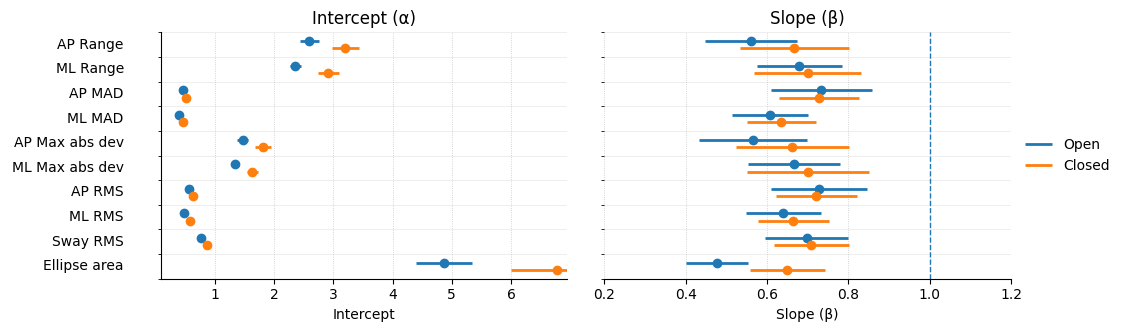

In [21]:
plot_forest_params_both_states(table_lmm_students, slope_xlim=(0.2,1.2), exclude_metrics=exclude_metrics, row_order=row_order)

### Average level

In [22]:
# Run across all metrics & states
table_ols_students = run_ols_table_all(students_average_level, states=("open","closed"), robust="HC3")

table_ols_pretty_students = prettify(table_ols_students, digits=3)
table_ols_pretty_students

,metric,state,intercept,intercept_CI,intercept_p,slope_zed,slope_CI,slope_p,slope_eq1_p,r2,r2_adj,rmse_model,rmse_raw
0,AP MAD,closed,-0.012,"[-0.147, 0.124]",0.865,0.842,"[0.604, 1.080]",0.000,0.194,0.709,0.698,0.086,0.141
1,AP MAD,open,0.005,"[-0.086, 0.095]",0.922,0.782,"[0.643, 0.921]",0.000,0.002,0.613,0.598,0.077,0.147
2,AP Max abs dev,closed,0.169,"[-0.336, 0.673]",0.513,0.776,"[0.519, 1.032]",0.000,0.087,0.604,0.588,0.331,0.467
3,AP Max abs dev,open,0.262,"[-0.144, 0.669]",0.206,0.614,"[0.399, 0.828]",0.000,0.000,0.555,0.538,0.235,0.574
4,AP RMS,closed,-0.005,"[-0.163, 0.153]",0.949,0.838,"[0.614, 1.061]",0.000,0.155,0.703,0.691,0.106,0.170
5,AP RMS,open,0.017,"[-0.097, 0.131]",0.773,0.758,"[0.608, 0.908]",0.000,0.002,0.632,0.618,0.090,0.185
6,AP Range,closed,0.159,"[-0.776, 1.093]",0.739,0.803,"[0.540, 1.066]",0.000,0.143,0.598,0.582,0.571,0.837
7,AP Range,open,0.462,"[-0.223, 1.146]",0.186,0.599,"[0.401, 0.797]",0.000,0.000,0.562,0.545,0.396,1.089
8,Ellipse area,closed,-0.040,"[-1.396, 1.315]",0.954,0.932,"[0.734, 1.131]",0.000,0.503,0.799,0.791,1.634,1.736
9,Ellipse area,open,1.108,"[-0.408, 2.624]",0.152,0.595,"[0.326, 0.864]",0.000,0.003,0.732,0.721,1.094,2.195


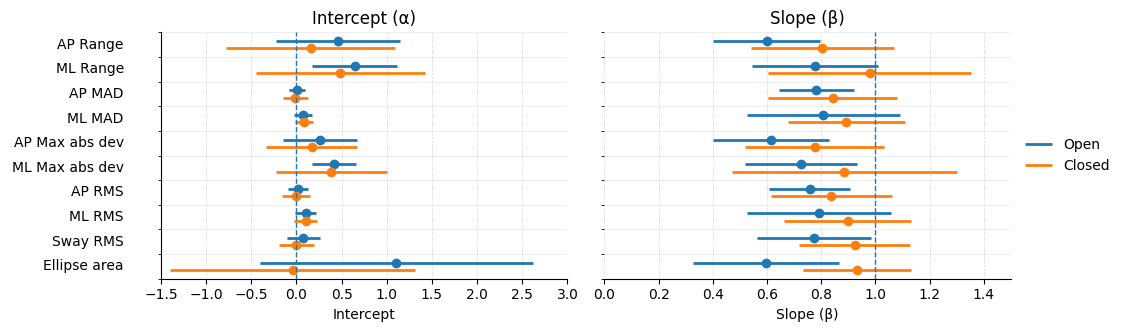

In [28]:
plot_forest_params_both_states(table_ols_students, intercept_xlim=(-1.5, 3), slope_xlim=(0,1.5), exclude_metrics=exclude_metrics, row_order=row_order)

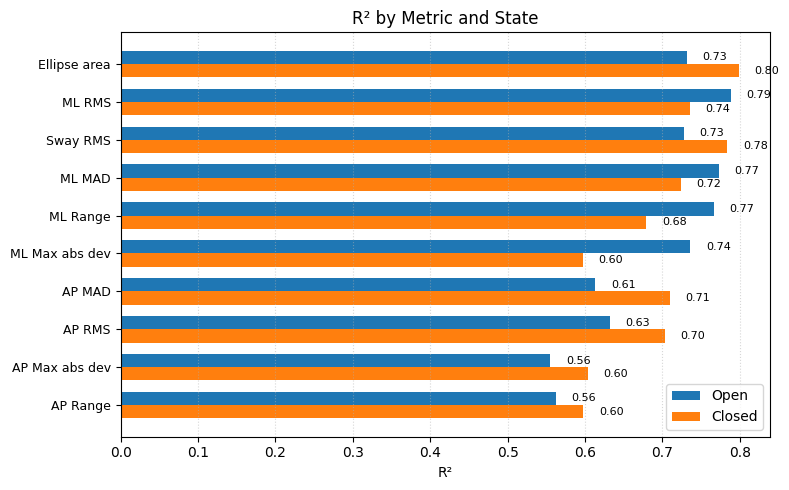

In [21]:
plot_r2(subset_students)

In [22]:
rmse_comparison(subset_students)

,metric,state,rmse_raw,rmse_model,diff,pct_change
0,AP Range,open,1.089,0.396,0.693,63.654
1,AP Max abs dev,open,0.574,0.235,0.339,59.060
2,AP RMS,open,0.185,0.090,0.095,51.414
3,Ellipse area,open,2.195,1.094,1.101,50.150
4,AP MAD,open,0.147,0.077,0.070,47.400
5,Sway RMS,open,0.157,0.087,0.070,44.715
6,AP MAD,closed,0.141,0.086,0.055,39.175
7,AP RMS,closed,0.170,0.106,0.064,37.725
8,ML Range,closed,0.594,0.404,0.189,31.894
9,AP Range,closed,0.837,0.571,0.266,31.768
